In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

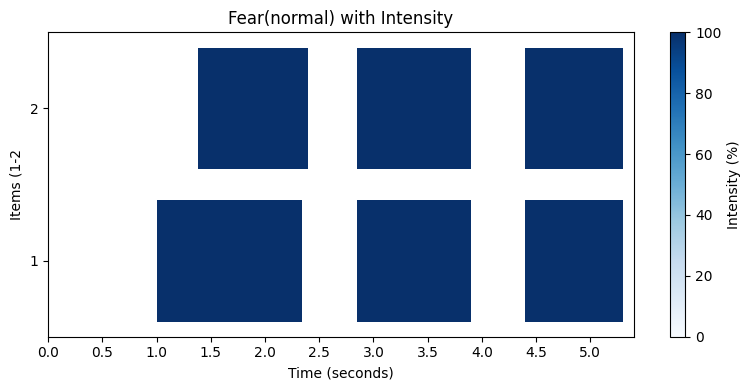

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Data for the bars
x_labels = ['1', '2', '3', '4']
y_segments = {
    '1': [(1.0, 2.27),(2.30, 4.4)],
    '2': [(1.0, 2.46),(2.48, 3.1), (3.15, 3.64), (3.68, 4.4)],
    '3': [(1.00, 4.4)],
    '4': [(1.00, 4.4)]
}

# Intensity values for each item
intensity = {'1': 100, '2': 100}

# Create a colormap and normalize intensity values
cmap = plt.cm.Blues  # Using 'viridis' colormap
norm = Normalize(vmin=0, vmax=100)  # Intensity ranges from 0 to 100

# Plot the bars
for label, segments in y_segments.items():
    for start, end in segments:
        ax.barh(
            label, end - start, left=start,
            color=cmap(norm(intensity[label]))  # Map intensity to color
        )

# Add colorbar to show the intensity scale
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for adding colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Intensity (%)")

# Set x and y axis limits
ax.set_xlim(0, 4.5)
ax.set_ylim(-0.5, len(x_labels) - 0.5)

# Add grid and labels
plt.xticks(np.arange(0, 4.51, 0.5))
ax.set_yticks(range(len(x_labels)))
ax.set_yticklabels(x_labels)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Items (1-4)")

# Display the plot
plt.title("Painful(KSL) with Intensity")  # Sadness(KSL), Anger(KSL), Disgust(KSL), Amusement(KSL), Surprised(KSL), Fear(KSL)
plt.tight_layout()
plt.show()

### Pulse width, Frequency, duration을 그릴 수 있는 코드

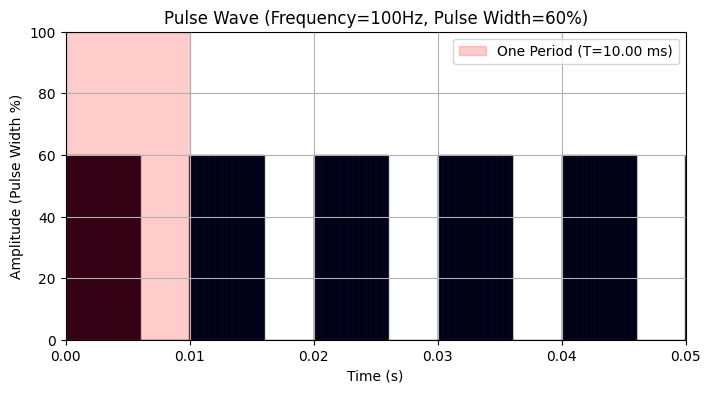

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
frequency = 100           # Hz
pulse_width_percent = 60  # 펄스 폭(%)
T = 1.0 / frequency       # 한 주기(초)
duty_cycle = pulse_width_percent / 100.0  # 0~1 범위

# 시뮬레이션할 총 시간: 예시로 5주기
num_cycles = 5
duration = num_cycles * T

# 시뮬레이션용 시간 해상도 설정
time_res = 1000
t = np.linspace(0, duration, time_res)

# ON/OFF 파형 생성
# - 각 시점 t에서 (t % T)/T < duty_cycle 이면 ON(=60), 아니면 OFF(=0)
# - ON 높이를 60으로 설정하여, 막대가 올라갔을 때 60%라는 의미가 시각적으로 드러나도록 함
waveform = np.where(((t % T)/T) < duty_cycle, 60, 0)

# 막대(bar) 그래프 그리기
plt.figure(figsize=(8,4))
bar_width = duration / time_res  # 막대 하나의 너비

plt.bar(t, waveform, width=bar_width, color='blue', alpha=0.7, edgecolor='black')

# 한 주기(0~T) 구간을 투명하게 강조
plt.axvspan(0, T, color='red', alpha=0.2, label=f'One Period (T={T*1000:.2f} ms)')

# 그래프 범위/레이블 설정
plt.xlim(0, duration)
plt.ylim(0, 100)  # 펄스 폭을 %로 표현하므로 최대 100
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Pulse Width %)')

plt.title(f'Pulse Wave (Frequency={frequency}Hz, Pulse Width={pulse_width_percent}%)')
plt.legend()
plt.grid(True)
plt.show()
